In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

pd.pandas.set_option('display.max_columns', None)

df = pd.read_csv("copy1.csv", usecols=['dt_iso', 'temp', 'year'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378888 entries, 0 to 378887
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   dt_iso  378888 non-null  object 
 1   temp    378888 non-null  float64
 2   year    378888 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ MB
None


In [55]:
df = df[(df.year<2022)]
df = df[df.year>2015]   

dt_iso   temp  year
376939  2021-12-31 19:00:00+00:00  24.95  2021
376940  2021-12-31 20:00:00+00:00  24.76  2021
376941  2021-12-31 21:00:00+00:00  24.88  2021
376942  2021-12-31 22:00:00+00:00  24.84  2021
376943  2021-12-31 23:00:00+00:00  24.55  2021

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52608 entries, 324336 to 376943
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   dt_iso  52608 non-null  datetime64[ns, UTC]
 1   temp    52608 non-null  float64            
 2   year    52608 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 1.6 MB


In [56]:
df.dt_iso = pd.to_datetime(df['dt_iso'], utc=True)

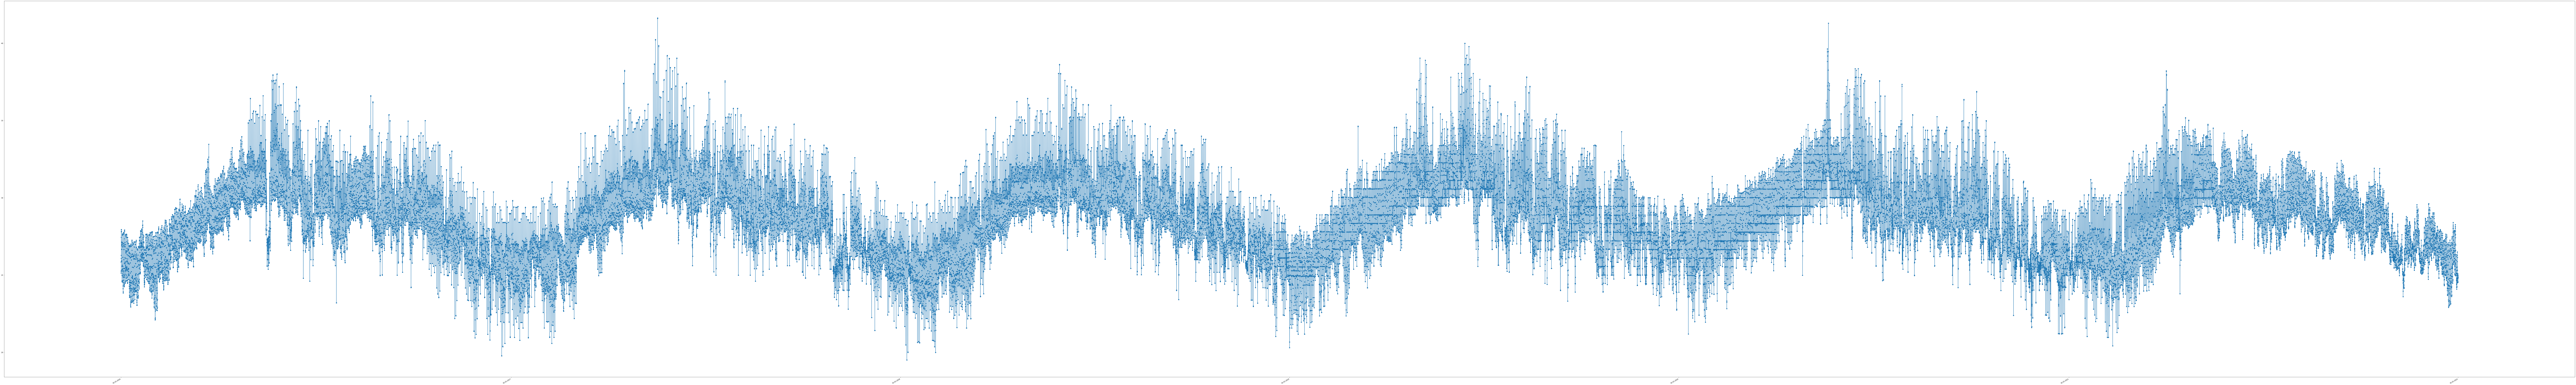

In [57]:
plt.figure(figsize=(300,50))
plt.plot_date(df.dt_iso, df.temp, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
# locator = mpl_dates.DayLocator()
# plt.gca().xaxis.set_major_locator(locator)

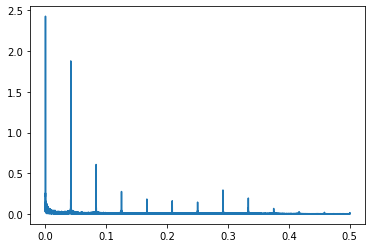

In [99]:
y1 = df.temp
f_vals = np.fft.fft(y1)
f_theo = 2*abs(f_vals/52608)
freqs = np.fft.fftfreq(52608)
mask = freqs > 0
plt.plot(freqs[mask], f_theo[mask])

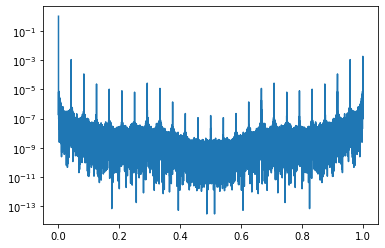

In [95]:
y = df.temp
f = abs(np.fft.fft(y))
num = np.size(df.dt_iso)
freq = [i/num for i in list(range(num))]
spectrum = f.real*f.real + f.imag*f.imag
nspectrum = spectrum/spectrum[0]
plt.semilogy(freq, nspectrum)

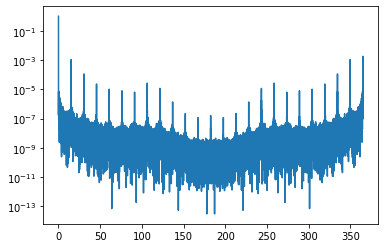

In [59]:
import pandas as pd
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/365)
plt.semilogy(results['period'], results['nspectrum'])

([<matplotlib.axis.XTick at 0x7f242e098880>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

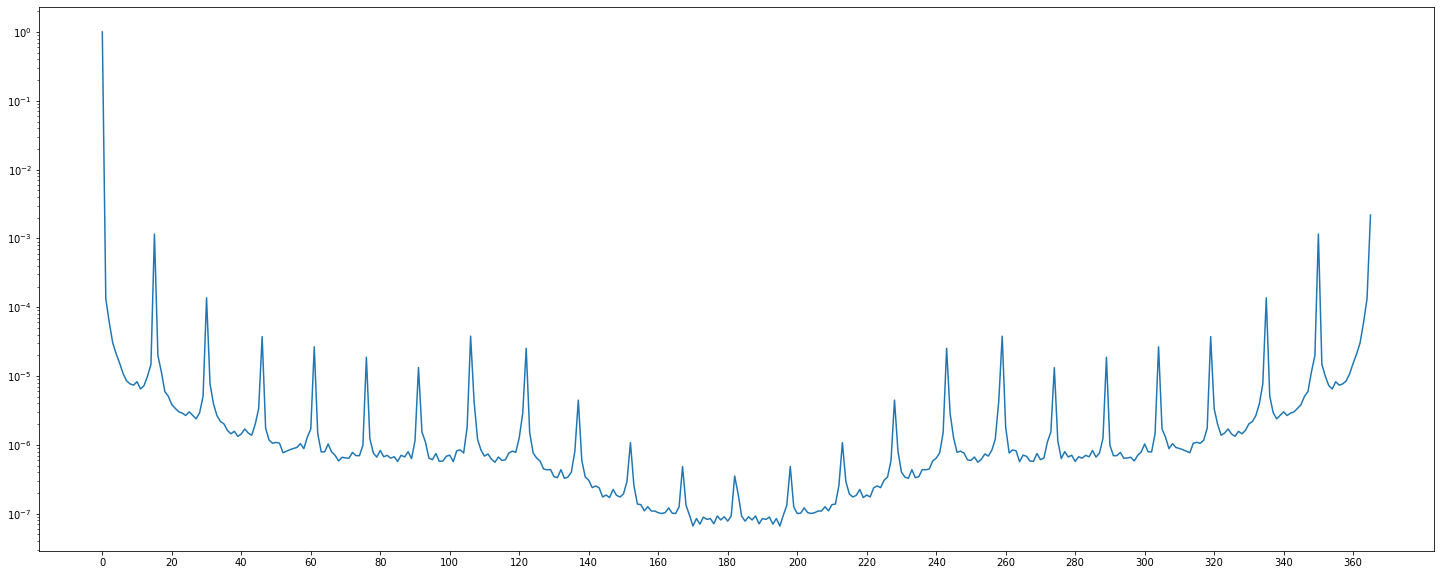

In [74]:
results['period_round'] = results['period'].round()
grouped_week = results.groupby('period_round')['nspectrum'].sum()
plt.figure(figsize=(25, 10))
plt.semilogy(grouped_week.index, grouped_week)
plt.xticks([i for i in range(0, 365, 20)])

In [63]:
from scipy.signal import find_peaks
peak_indices = find_peaks(grouped_week)
peak_indices

(array([ 10,  15,  25,  30,  38,  41,  46,  50,  57,  61,  65,  69,  72,
         76,  80,  82,  84,  86,  88,  91,  96, 100, 103, 106, 111, 114,
        118, 122, 129, 132, 137, 142, 145, 147, 152, 157, 163, 167, 171,
        173, 175, 177, 179, 182, 186, 188, 190, 192, 194, 198, 202, 208,
        213, 218, 220, 223, 228, 233, 236, 243, 247, 251, 254, 259, 262,
        265, 269, 274, 277, 279, 281, 283, 285, 289, 293, 296, 300, 304,
        308, 315, 319, 324, 327, 335, 340, 350, 355]),
 {})

<Figure size 1800x720 with 0 Axes>

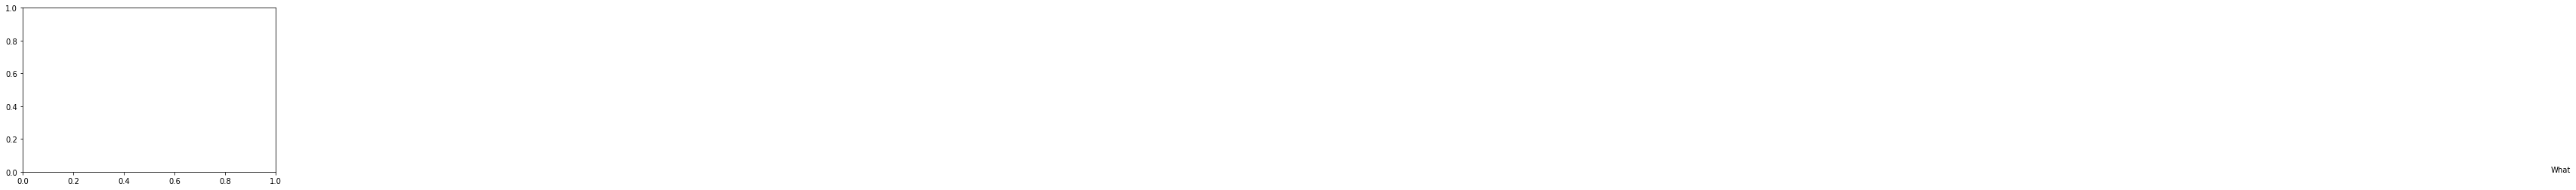

<Figure size 1800x720 with 0 Axes>

In [60]:
dff = df.set_index('dt_iso')

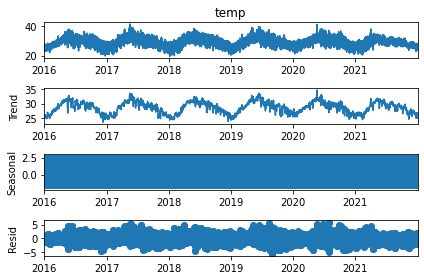

In [61]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(dff.temp)
resplot = res.plot()